In [1]:

# Project Name : Fashion Trend Analysis



Research Question: How accurately can we predict the price of apparel products based on brand and gender using machine learning algorithms?

Main Objective: To develop a machine learning model that accurately predicts the price of apparel products based on brand and gender with a mean absolute error of less than 10% of the average price.
Primary Objective: To investigate the gender-based distribution of apparel products in the dataset and determine whether there are significant differences in the number of products available for each gender, in order to gain insight into potential biases in the fashion industry.

Primary Objective: To investigate the gender-based distribution of apparel products in the dataset and determine whether there are significant differences in the number of products available for each gender, in order to gain insight into potential biases in the fashion industry.



In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

In [3]:
 # read the dataset into a pandas dataframe



amazon_df = pd.read_csv('fashion.csv')


print(amazon_df.columns)


myntra_df = pd.read_csv('Myntra.csv')

print(myntra_df.columns)


Index(['title', 'price', 'rating', 'reviews', 'availability', 'brand', 'color',
       'rank', 'date', 'gender', 'Brand'],
      dtype='object')
Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')


In [4]:
myntra_df = myntra_df.dropna()

# drop the 'availability','rating', 'reviews', 'rank', 'date','Unnamed: 9', 'brand' columns, since it is not needed

amazon_df = amazon_df.drop([ 'availability','rating', 'reviews', 'rank', 'date',  'brand' ], axis=1)


myntra_df = myntra_df.drop([ 'ProductID','NumImages','Description' ], axis=1)

print(amazon_df)

#print(myntra_df)

                                                 title    price      color  \
0    REORIA Womens Sexy Square Neck Sleeveless Tank...  $25.99    01-black   
1    MakeMeChic Women's 4pcs Casual Solid Sleevelss...  $47.99     A Multi   
2    MakeMeChic Women's Summer Crop Top Solid Short...  $10.99       Khaki   
3    MEROKEETY Womens V Neck Tank Tops Summer Sleev...  $24.99       White   
4    Crop Top Athletic Shirts for Women Yoga Workou...  $22.99        Pink   
..                                                 ...      ...        ...   
349  Womens Cargo Capris Hiking Pants Lightweight Q...  $10.79     A1#blue   
350  ODODOS Women's Crop 3-Pack Washed Seamless Rib...  $28.98       beige   
351  Dokotoo Womens 2023 Summer Floral Print Off Th...  $36.99       White   
352  Floerns Women's Boho Floral Print Off Shoulder...  $41.99   Red/White   
353  WIHOLL Two Piece Outfits for Women Short Sleev...  $26.99     1-black   

    gender        Brand  
0    Women      REORIA   
1    Women 

In [5]:
# convert INR to USD

myntra_df = pd.DataFrame(myntra_df)

# define conversion rate

conversion_rate = 0.012

# convert INR to USD

myntra_df['Price'] = myntra_df['Price (INR)'] * conversion_rate

# round to two decimal places
myntra_df['Price'] = myntra_df['Price'].round(2)


# define a function to add dollar sign before price values
def add_dollar_sign(price):
    return '$ ' + str(price)

# apply the function to the 'Price' column using the 'apply' method
myntra_df['Price'] = myntra_df['Price'].apply(add_dollar_sign)


# myntra_df

In [6]:
myntra_df = myntra_df.drop([ 'Price (INR)' ], axis=1)

print(myntra_df)

                                             ProductName ProductBrand  Gender  \
0      DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY  Unisex   
1      EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   Women   
2      SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   Women   
3      Raymond Men Blue Self-Design Single-Breasted B...      Raymond     Men   
4      Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx     Men   
...                                                  ...          ...     ...   
12485  Laceandme Black Lace Non-Wired Lightly Padded ...    Laceandme   Women   
12486  Pepe Jeans Men Black Hammock Slim Fit Low-Rise...   Pepe Jeans     Men   
12487                 Mochi Women Gold-Toned Solid Heels        Mochi   Women   
12488  612 league Girls Navy Blue & White Printed Reg...   612 league   Girls   
12490  Pepe Jeans Men Black & Grey Striped Polo Colla...   Pepe Jeans     Men   

      PrimaryColor     Pric

In [7]:
# Rename the columns
amazon_df = amazon_df.rename(columns={'title': 'ProductName',  'Brand': 'ProductBrand', 'gender': 'Gender', 'color': 'PrimaryColor' , 'price': 'Price'})

print(amazon_df)


                                           ProductName    Price PrimaryColor  \
0    REORIA Womens Sexy Square Neck Sleeveless Tank...  $25.99      01-black   
1    MakeMeChic Women's 4pcs Casual Solid Sleevelss...  $47.99       A Multi   
2    MakeMeChic Women's Summer Crop Top Solid Short...  $10.99         Khaki   
3    MEROKEETY Womens V Neck Tank Tops Summer Sleev...  $24.99         White   
4    Crop Top Athletic Shirts for Women Yoga Workou...  $22.99          Pink   
..                                                 ...      ...          ...   
349  Womens Cargo Capris Hiking Pants Lightweight Q...  $10.79       A1#blue   
350  ODODOS Women's Crop 3-Pack Washed Seamless Rib...  $28.98         beige   
351  Dokotoo Womens 2023 Summer Floral Print Off Th...  $36.99         White   
352  Floerns Women's Boho Floral Print Off Shoulder...  $41.99     Red/White   
353  WIHOLL Two Piece Outfits for Women Short Sleev...  $26.99       1-black   

    Gender ProductBrand  
0    Women   

In [8]:
combined_df = pd.concat([myntra_df, amazon_df], ignore_index=True)

combined_df.to_csv('AMAZONMYNTRAFASHION.csv', index=False)

print(combined_df)

                                             ProductName ProductBrand  Gender  \
0      DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY  Unisex   
1      EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   Women   
2      SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   Women   
3      Raymond Men Blue Self-Design Single-Breasted B...      Raymond     Men   
4      Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx     Men   
...                                                  ...          ...     ...   
11946  Womens Cargo Capris Hiking Pants Lightweight Q...       Amazon   Women   
11947  ODODOS Women's Crop 3-Pack Washed Seamless Rib...      ODODOS    Women   
11948  Dokotoo Womens 2023 Summer Floral Print Off Th...     Dokotoo    Women   
11949  Floerns Women's Boho Floral Print Off Shoulder...     Floerns    Women   
11950  WIHOLL Two Piece Outfits for Women Short Sleev...      WIHOLL    Women   

      PrimaryColor     Pric

In [9]:
# display the data types and non-null counts for each attribute
print(combined_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11951 entries, 0 to 11950
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductName   11951 non-null  object
 1   ProductBrand  11951 non-null  object
 2   Gender        11951 non-null  object
 3   PrimaryColor  11951 non-null  object
 4   Price         11951 non-null  object
dtypes: object(5)
memory usage: 467.0+ KB
None


In [10]:


import plotly.graph_objs as go

# Replace 'Boys' and 'Girls' with 'Men' and 'Women'
combined_df = combined_df.replace({'Boys': 'Men', 'Girls': 'Women'})

# Remove rows with 'Unisex Kids' gender
combined_df = combined_df[combined_df['Gender'] != 'Unisex Kids']

# Replace 'U.S. Polo Assn. Kids' with 'US Polo'
combined_df = combined_df.replace({'U.S. Polo Assn. Kids': 'US Polo'})

# Count the number of observations for each gender
gender_counts = combined_df['Gender'].value_counts()

# Calculate the percentage of each gender category
gender_percentages = 100 * gender_counts / gender_counts.sum()

# Create a horizontal bar chart with percentages
fig = go.Figure(data=[go.Bar(
    x=gender_counts.values,
    y=gender_counts.index,
    orientation='h',
    marker=dict(color=['#4c78a8', '#72b7b2', '#6b92bc']),
    text=[f'{p:.2f}%' for p in gender_percentages],
    textposition='inside',
    textfont=dict(color='#fff', size=14),
)])

# Update layout and formatting options
fig.update_layout(
    margin=dict(t=100, b=30, l=0, r=0),
    title='Gender Overview',
    title_font=dict(size=45, color='#555', family="Lato, sans-serif"),
    font=dict(size=17, color='#8a8d93'),
    yaxis=dict(title='Gender'),
    xaxis=dict(title='Count'),
    plot_bgcolor='#fff',
    paper_bgcolor='#fff',
)

# Show the plot
fig.show()


In [11]:
combined_df_pb_g = pd.crosstab(combined_df['ProductBrand'], combined_df['Gender'], margins=True).reset_index()
combined_df_pb_m = combined_df_pb_g.sort_values(by='Men', ascending=False)[1:11]
combined_df_pb_w = combined_df_pb_g.sort_values(by='Women', ascending=False)[1:11]
combined_df_pb_u = combined_df_pb_g.sort_values(by='Unisex', ascending=False)[1:11]


In [12]:


# chart
fig = make_subplots(rows=1, cols=2,
                    vertical_spacing=0, horizontal_spacing=0.15)
                   

fig.add_trace(go.Scatter(x=combined_df_pb_w['Women'], y=combined_df_pb_w['ProductBrand'], marker=dict(size=10, color=['#72b7b2']*10),
                         mode='markers', name='Women'), 
                     row=1, col=1)
fig.add_trace(go.Scatter(x=combined_df_pb_w['Men'], y=combined_df_pb_w['ProductBrand'], marker=dict(size=10, color=['#4c78a8']*10),
                         mode='markers', name='Men'), 
                     row=1, col=1)
fig.add_trace(go.Scatter(x=combined_df_pb_m['Men'], y=combined_df_pb_m['ProductBrand'], marker=dict(size=10, color=['#4c78a8']*10),
                         mode='markers', showlegend=False, name='Men', orientation='h'), 
                     row=1, col=2)
fig.add_trace(go.Scatter(x=combined_df_pb_m['Women'], y=combined_df_pb_m['ProductBrand'], marker=dict(size=10, color=['#72b7b2']*10),
                        mode='markers', showlegend=False, name='Women', orientation='h'), 
                     row=1, col=2)
#fig.add_hline(y=0, line_width=2, line_dash="dash", line_color="#000", row=2, col=1)

fig.update_yaxes(ticksuffix=' ', gridcolor='#F9F1F0', categoryorder='total ascending') 
fig.update_xaxes(zeroline=False, showgrid=False, side='top')

fig.update_layout(height=450, 
                  margin=dict(b=20,r=50,l=100,t=150),
                  hovermode="y unified", 
                  title={'text': "<span style='font-size:50px; color=#555; font-family:Times New Roman'>The Brands Men, Womens ♥️ More</span>",
                         'y':0.91, 'x':0.5, 
                         'xanchor': 'center', 'yanchor': 'top'},
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  font=dict(color='#666'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  legend=dict(title="", orientation="h", 
                              yanchor="bottom", xanchor="center",
                              x=0.5, y=1.22, 
                              font_size=13))
fig.add_annotation(dict(x=0, y=1.2,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=17,
                        text="Top 10 standout brands for <span style='color:#72b7b2'><b>Women</b></span><br>"))
fig.add_annotation(dict(x=0.9, y=1.2,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=17,
                        text="Top 10 standout brands for <span style='color:#4c78a8'><b>Men</b></span><br>"))
fig.show()

In [13]:
# convert price to numerical values

combined_df['Price'] = combined_df['Price'].str.replace('$', '').astype(float)



C:\Users\dx_st\AppData\Local\Temp\ipykernel_22540\2527619110.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [14]:
# again, let's see display the data types and non-null counts for each attribute
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11905 entries, 0 to 11950
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   11905 non-null  object 
 1   ProductBrand  11905 non-null  object 
 2   Gender        11905 non-null  object 
 3   PrimaryColor  11905 non-null  object 
 4   Price         11905 non-null  float64
dtypes: float64(1), object(4)
memory usage: 558.0+ KB
None


In [15]:
# Replace gender values with numerical codes
gender_codes = {'Men': 1, 'Women': 2, 'Unisex': 3}
combined_df['Gender'] = combined_df['Gender'].replace(gender_codes)



In [16]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11905 entries, 0 to 11950
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   11905 non-null  object 
 1   ProductBrand  11905 non-null  object 
 2   Gender        11905 non-null  int64  
 3   PrimaryColor  11905 non-null  object 
 4   Price         11905 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 558.0+ KB
None


In [17]:
from sklearn.preprocessing import LabelEncoder

# encoding product brand for machine learning

encoder=LabelEncoder()
combined_df['ProductBrand']=encoder.fit_transform(combined_df['ProductBrand'])


In [18]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11905 entries, 0 to 11950
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   11905 non-null  object 
 1   ProductBrand  11905 non-null  int32  
 2   Gender        11905 non-null  int64  
 3   PrimaryColor  11905 non-null  object 
 4   Price         11905 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 511.5+ KB
None


In [19]:
print(combined_df)

                                             ProductName  ProductBrand  \
0      DKNY Unisex Black & Grey Printed Medium Trolle...           173   
1      EthnoVogue Women Beige & Grey Made to Measure ...           214   
2      SPYKAR Women Pink Alexa Super Skinny Fit High-...           591   
3      Raymond Men Blue Self-Design Single-Breasted B...           552   
4      Parx Men Brown & Off-White Slim Fit Printed Ca...           514   
...                                                  ...           ...   
11946  Womens Cargo Capris Hiking Pants Lightweight Q...            52   
11947  ODODOS Women's Crop 3-Pack Washed Seamless Rib...           491   
11948  Dokotoo Womens 2023 Summer Floral Print Off Th...           190   
11949  Floerns Women's Boho Floral Print Off Shoulder...           238   
11950  WIHOLL Two Piece Outfits for Women Short Sleev...           724   

       Gender PrimaryColor   Price  
0           3        Black  140.94  
1           2        Beige   69.72  


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data
X = combined_df[['Gender', 'ProductBrand']] # Select relevant features

y = combined_df['Price'] # Select target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

# Choose a model
model = RandomForestRegressor(n_estimators=100, random_state=39)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")



# Make a sample prediction
sample = {'Gender': 2, 'ProductBrand': 214}
predicted_price = model.predict(pd.DataFrame([sample]))[0]
print(f"Predicted price: {predicted_price:.2f}")  # Original price 69.72


MAE: 6.37
MSE: 251.71
RMSE: 15.87
R2 score: 0.67
Predicted price: 73.20


Here! In Machine learning model, MAE (Mean Absolute Error) = 6.37: This is the average absolute difference between the predicted and actual values. 
                                 MSE (Mean Squared Error) = 251.71: This is the average squared difference between the predicted and actual values.
                                 RMSE (Root Mean Squared Error) = 15.87: This is the square root of the MSE. It measures the standard deviation of the errors in the predictions. 
                                 R2 score = 0.67: This is a measure of how well the model fits the data.In my case, the R2 score is 0.67, which indicates that the model explains 67% of the variance in the target variable. 

Overall, this model has an average MAE, a relatively high MSE and RMSE, and a moderate R2 score. This suggests that the model is making some errors in its predictions, but it is still able to explain a significant proportion of the variance in the target variable. it not and amazing model but it kind a moderate.

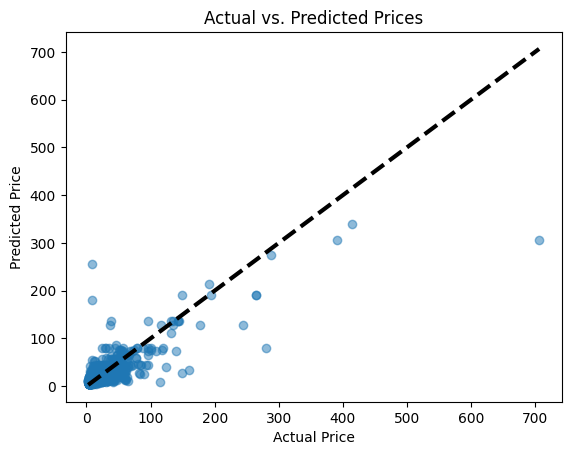

In [21]:
import matplotlib.pyplot as plt

# Plot predicted prices versus actual prices
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('Actual vs. Predicted Prices')
plt.show()



Lastly, I would Like to say If I could scrape more data from amazon, I might able to do better analysis, My amazon scrape data is relatively small compare to kaggle data set. which dominant amazon data, and the Overall Analysis is kind a dependant on kaggle data set. I'm trying to scrape more data from amazon in future and will try for an improvement